# Name: Zain Bin Tariq
# Student ID: 23100737

In [1]:
# Here I am importing important librarie
# for data manupulation, numerical operations, and data visualization 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Here I load and prepocess inside the function 
def Data_load_preprocess():
    # Here I load the dataset with the help of pandas library from a CSV file
    data_df = pd.read_csv('Mall_Customers.csv')
    # I drop the column that will not use in further such as CustomerID is not necessary for clustering and regression. So, I remove it
    data_df = data_df.drop(columns=['CustomerID'])
    # In this line, I encode the geneder variables for model compatibility
    data_df['Gender'] = data_df['Gender'].map({'Male': 0, 'Female': 1})
    # I delete or drop the data of rowa where values are missing 
    data_df = data_df.dropna()
    return data_df

# Here I call the function coz I want to see the data 
Data_load_preprocess()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
245,0,30,297,69
246,1,56,311,14
247,0,29,313,90
248,1,19,316,32


In [3]:
# This is the function where i am execute or perform clustering 
# and also i am using k mean and perform cluter with silhouette_score
def GrapghDisplayCluster(DataCluster, NumberofClustering):
    # In this piece of code, I am selecting necessary features for cluster
    ClusterFetures = DataCluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    # Here I am initializing k mean then i fit the kmean cluster model
    kmeans = KMeans(n_clusters=NumberofClustering, random_state=42)
    DataCluster['Cluster'] = kmeans.fit_predict(ClusterFetures)
    # Here i am calculating score of silhouette assess the quality of cluster
    NumberofClustering = silhouette_score(ClusterFetures, DataCluster['Cluster'])
    # Here i am returing the data
    return DataCluster, NumberofClustering

In [4]:
# Here in this function, i am fitting a regresion model
def RegressionFunc(RegData):
    # here i am defining the feature also target the varible and it is for prediction 
    X = RegData[['Age', 'Annual Income (k$)', 'Gender']]  # Features
    y = RegData['Spending Score (1-100)']  # Target varible

    # i split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # this is linear regresion model, this is the way of initialize the linear reg
    RegModel = LinearRegression()
    # i am here train the model
    RegModel.fit(X_train, y_train)

    # here i make predictions by using testing the data
    y_pred = RegModel.predict(X_test)
    # i am assess the performance of the model using metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return RegModel, mse, r2 # i am returing the model, mean square err and R square 

In [5]:
# these functions are display the data in graph form \

# this is the function of histogram for given col in the dataset
def HistoGram_Graph(data, col):
    plt.figure(figsize=(8, 5)) # here i set the size of the figure
    plt.hist(data[col], bins=10, color='skyblue', edgecolor='black') # plotting the histogram 
    plt.title(f'Distribution of {col}') # i set title here
    plt.xlabel(col) # label of x axix name with column name
    plt.ylabel('frequency') # here frequency is the y axix name
    plt.grid(True) # added grid in the graph
    plt.show() # display the graph
    

# this is the function Elbow graph where we find the optimal no of cluster for k means
def ElbowGraph(data):
     # here i am extracting the features for cluster
    features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    distortions = [] # this is list where we store distortion values for every no of cluster
    K = range(1, 11) # this is rnge of the cluster to test
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42) # i intinalize the K means with k clusters
        kmeans.fit(features) # here i fit K means int the features
        distortions.append(kmeans.inertia_) # here i append the inertia  value

    # here i am plotting the graph of elbow
    plt.figure(figsize=(8, 5)) # setting size of graph 
    plt.plot(K, distortions, marker='o') # Plot distortions against the no of cluster
    plt.title('Elbow Method for Optimal Clusters') # here i am setiing the title 
    plt.xlabel('Number of Clusters') # here i am setting the name of x label 
    plt.ylabel('Distortion') # here i am setting the name of y label 
    plt.grid(True) # add grid coz it will be readbale for user and more efficient way to display the graph.
    plt.show() # here i display the graph 

    # Find the "elbow" point where the distortion curve starts to flatten
    optimal_clusters = K[distortions.index(min(distortions[1:], key=lambda x: abs(x - distortions[0])))]
    return optimal_clusters


# this is the function to print a heatmap that display  correlation between features in the dataset
def HeatMapGraph(data):
    plt.figure(figsize=(10, 6)) # setting size of graph 
    correlation_matrix = data.corr() # here i am calculating matrix of correlation of the dataset
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # here i add a heatmap with annotations and a colormap
    plt.title('Feature Correlation Heatmap') # setting the title of graph
    plt.show()

Data loaded and preprocessed successfully.


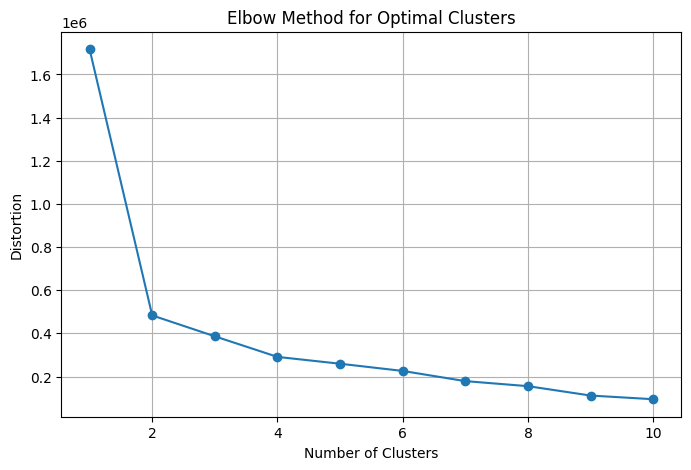

Optimal number of clusters based on Elbow Method: 2
Clustering completed with 2 clusters. Silhouette Score: 0.68
Regression Model Performance:
 - Mean Squared Error: 564.30
 - R-squared Score: 0.21


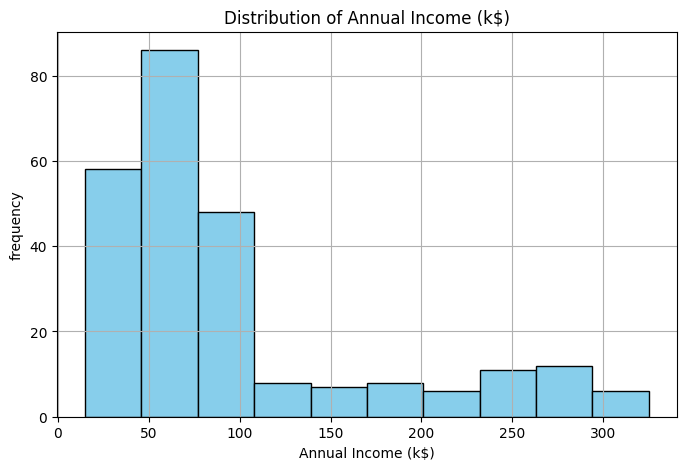

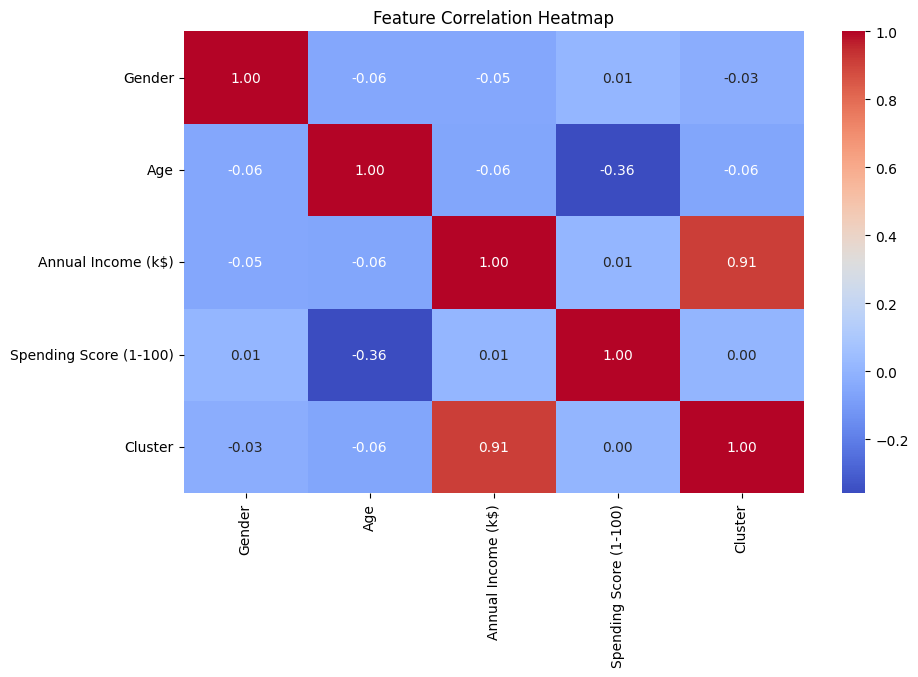

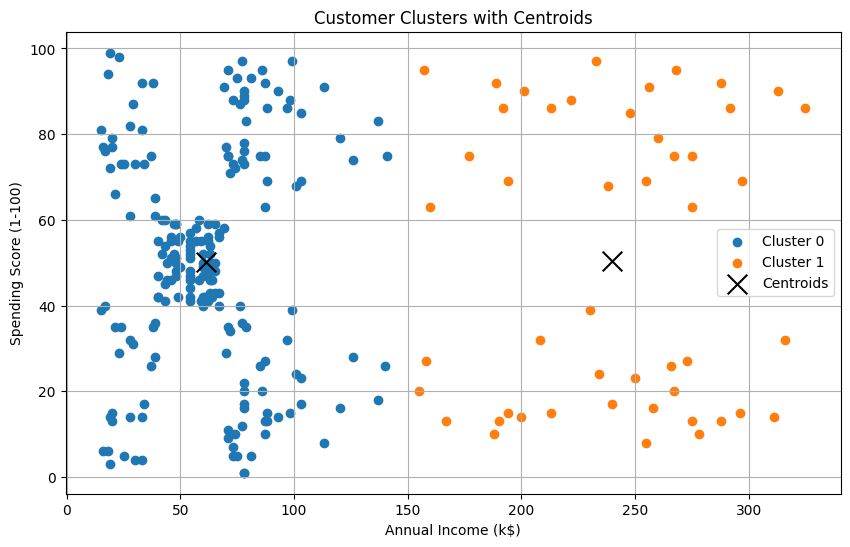

In [6]:
# this is the main workflow of the code
if __name__ == "__main__":
    # here i am call the function where I load and preprocess the dataset
    data = Data_load_preprocess()
    print("Data loaded and preprocessed successfully.")

     # Automatically determine the optimal number of clusters using Elbow Method
    optimal_clusters = ElbowGraph(data)
    print(f"Optimal number of clusters based on Elbow Method: {optimal_clusters}")

    # I am performing clustering in the data set from MallCustomer.csv
    data, score = GrapghDisplayCluster(data, optimal_clusters) # i am calculating the K means cluster with 3 clusters
    #print(f"Clustering completed. Silhouette Score: {score:.2f}") # i am show the cluster quality metric
    print(f"Clustering completed with {optimal_clusters} clusters. Silhouette Score: {score:.2f}")

    # Fit regression model
    # here I am fitting a reg model to predict scores spending
    model, mse, r2 = RegressionFunc(data) # i am calling the regression function
    print(f"Regression Model Performance:\n - Mean Squared Error: {mse:.2f}\n - R-squared Score: {r2:.2f}") # i am display the model performance metrics here

    # i call the functions to visualizations the graph
    HistoGram_Graph(data, 'Annual Income (k$)') # I am print the histogram of annual income
    #ElbowGraph(data)  # i am print the Elbow graph to find optimal clusters
    HeatMapGraph(data) # I am print a heatmap of feature correlations

    # here i display the clusters and centroids
    plt.figure(figsize=(10, 6)) # here i am setting the figure size for the plot
    
    # here I am plot the individual clusters
    for cluster_id in data['Cluster'].unique(): # I am ploting the individual clusters
        cluster_data = data[data['Cluster'] == cluster_id] # here i perform that filter data for the current cluster
        plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_id}')  # I am plot the cluster points with label
    
    # here I am getting the k means cluster model to get and display the centroids
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42) # I am initializing k mean with 3 clusters
    features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # I am extracting the features for clustering
    kmeans.fit(features)  # here I am fitting the model for data to calculate centroids
    centroids = kmeans.cluster_centers_ # here I am acessing the centroids value of cluster

    # this is plot centroid points
    plt.scatter(centroids[:, 1], centroids[:, 2], s=200, color='black', marker='x', label='Centroids')

    # here I finalize cluster and display plot figure
    plt.title('Customer Clusters with Centroids') # here I am setting the title of the graph or a plot
    plt.xlabel('Annual Income (k$)') # here I give the label name of x axix
    plt.ylabel('Spending Score (1-100)') # here I give the label name of y axix
    plt.legend() # here i add legend for clusters and centroids
    plt.grid(True) # add grid coz it will be readbale for user and more efficient way to display the graph.
    plt.show() # here i display the graph 


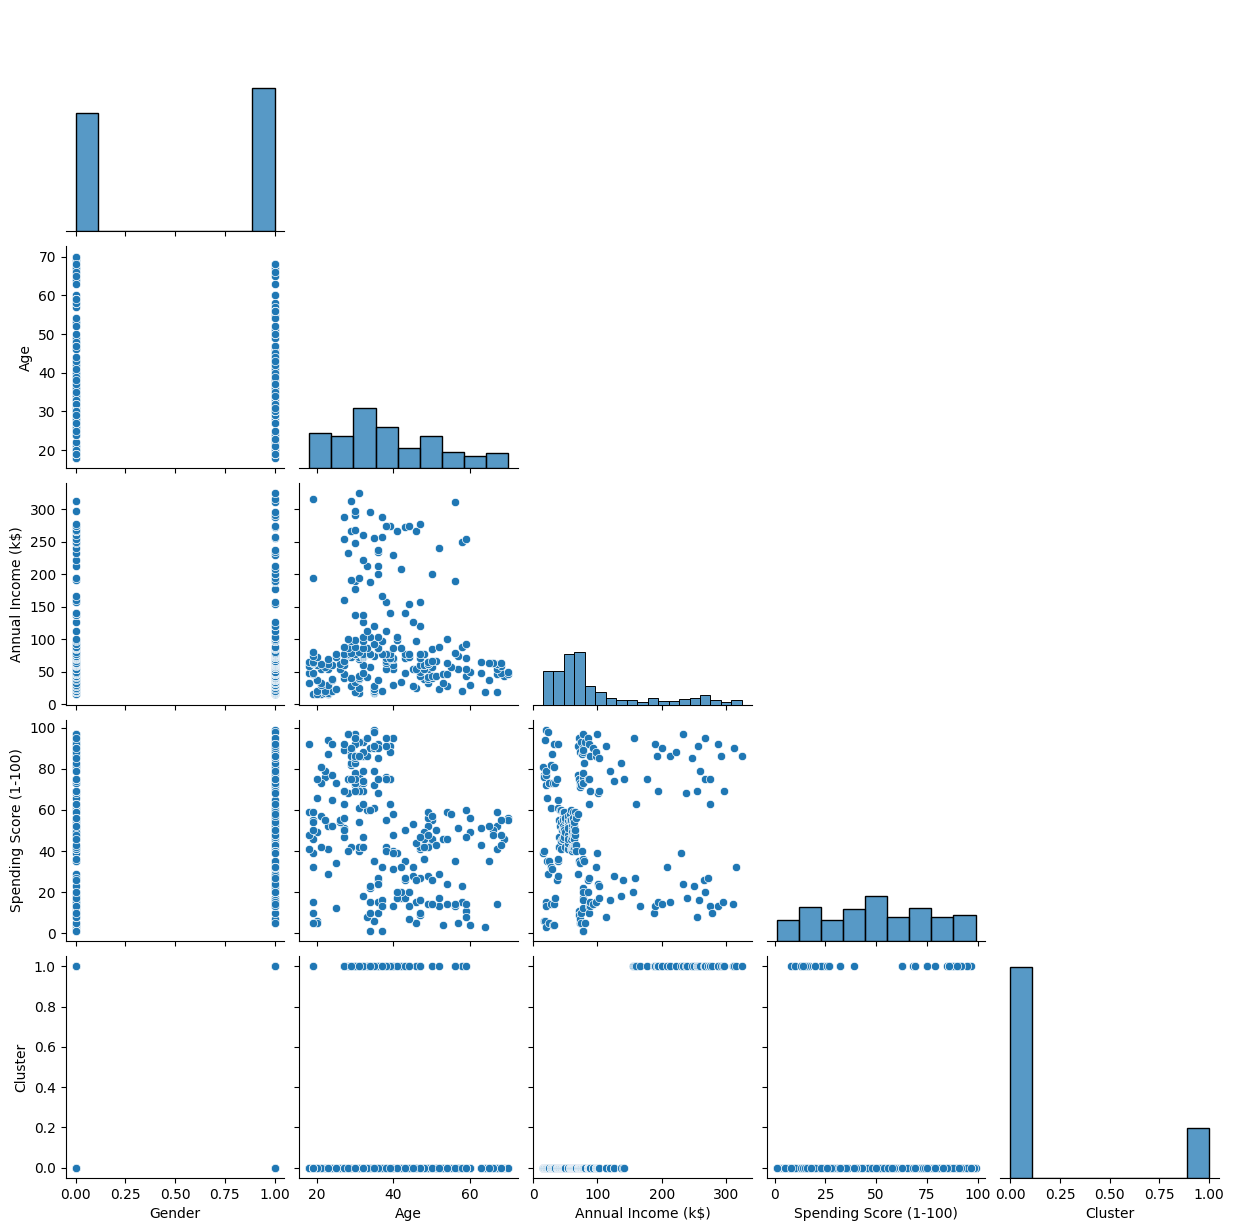

In [7]:
# Here I make apair plot to display pairwise relationships b/w featres in the dataset
sns.pairplot(data, corner=True) # parameter 'corner=True' display the lower triangle of the plot 
plt.show()